In [1]:
#The following jupyter notebook features a python
#implimentation of the model of population growth given
#by David Aldous, Bowen Huang in their paper https://arxiv.org/abs/1209.5120v1

In [2]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import Voronoi, voronoi_plot_2d
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'

In [3]:
#Initialize params
c_0 = 1
alpha = 0.1
beta = 1
#Initialize population where each city described as an array of
#population number and coordinates
start_population = np.hstack((np.ones((1,1)),np.random.rand(1,2)))

In [4]:
#Influence function
def i_0(n,r):
    return (c_0)*(n**alpha)*(r**-beta)

In [5]:
#Iteration function
def iteration(population):
    u = np.random.rand(1,2)
    i_u_0 = i_0(population[:,0],np.linalg.norm(population[:,1:] - u,axis=1))
    i_u = np.amax(i_u_0)
    #Probabilities
    a_1 = 1/(1+i_u)
    if np.random.choice([True,False],p = [a_1,1-a_1]):
        new_population = np.vstack((population,np.hstack((np.ones((1,1)),u))))
    else:
        new_population = population.copy()
        new_population[np.argmax(i_u_0)] = new_population[np.argmax(i_u_0)] + np.hstack((np.ones((1,1)),np.zeros((1,2))))
    return new_population

In [7]:
#Run this code to run computation
#Initialize compute params
time_steps = 10000
population_dish = [] #List to store states of population through consecutive iteration

for t in range(time_steps):
    population_dish.append(start_population)
    start_population = iteration(start_population)

In [20]:
#display one state of population with voronoi tesselation
def display_population(element):
    fig, ax = plt.subplots(dpi = 300)
    ax.scatter(element[:,1],element[:,2],s = 0.05*element[:,0],color = 'crimson')
    voronoi_plot_2d(Voronoi(element[:,1:]),ax = ax,show_points = False,show_vertices = False,line_width = 0.5)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_axis_off()
    ax.set_aspect(1)
    plt.show()

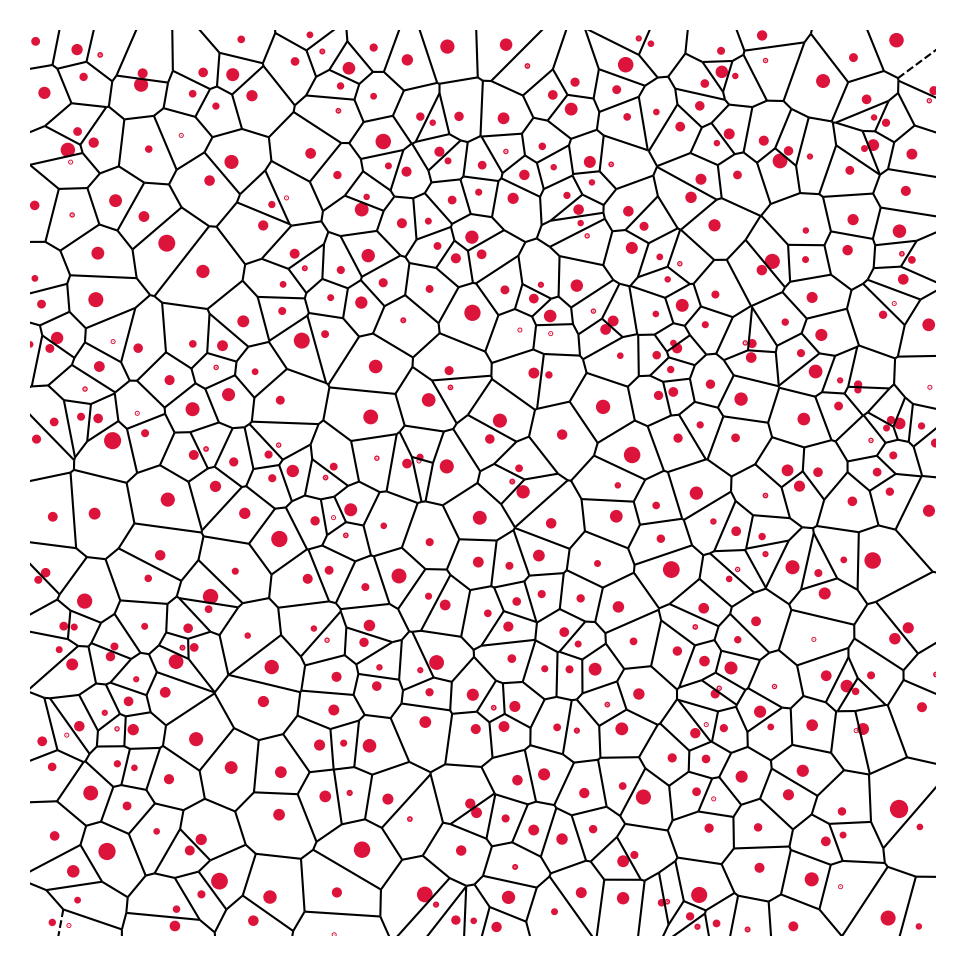

In [21]:
display_population(population_dish[-1])

In [22]:
#Animation engine
fig, ax = plt.subplots(dpi=300)
plt.close()

def update(i):
    element = population_dish[i]
    ax.clear()
    ax.scatter(element[:,1],element[:,2],s = element[:,0],color = 'crimson')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect(1)
    ax.set_axis_off()

In [24]:
#Command to animate may take some time
ani = animation.FuncAnimation(fig,
                              update,
                              frames=time_steps,
                              #init_func = init,
                              interval=10,
                              blit=False)
plt.close()
#Rendering animation will take 
ani.save("spatial_model_of_city_growth_.mp4",fps=100) #Saving comment locked
#Uncomment to save animation
#saving will again render it from the start